<h1>Álgebra Linear com Scipy</h1>
<p>fonte: https://www.math.ubc.ca/~pwalls/math-python/linear-algebra/linear-algebra-scipy/ </p>

<h2>Criar matrizes</h2>

In [11]:
import numpy as np
import scipy.linalg as la

In [4]:
#1D array
a = np.array([1,3,-2,1])
print(a)
print(a.shape) #tuple

[ 1  3 -2  1]
(4,)


In [8]:
#2D array
M = np.array([[1,2], [3,7], [-1,5]])
print(M)
M.ndim

[[ 1  2]
 [ 3  7]
 [-1  5]]


2

In [9]:
M.shape

(3, 2)

In [11]:
col = M[:,1] #printa a segunda coluna
print(col)

[2 7 5]


In [12]:
col.shape #é um vetor linha

(3,)

In [14]:
col_as_column = np.array([2,7,5]).reshape(3,1) #vetor coluna da 2ª coluna, não linha como o col
print(col_as_column)

[[2]
 [7]
 [5]]


In [17]:
print("Dimensoes: ", col_as_column.ndim)
print("Shape: ", col_as_column.shape)
print("Size: ", col_as_column.size)

Dimensoes:  2
Shape:  (3, 1)
Size:  3


<h2>Operações Aritméticas</h2>

+, - , / , * , ** são operações por elemento (elementwise)

In [18]:
M = np.array([[3,4],[-1,5]])
print(M)

[[ 3  4]
 [-1  5]]


In [20]:
M*M #eleva cada elemento ao quadrado

array([[ 9, 16],
       [ 1, 25]])

In [22]:
M@M #faz o produto linha-por-coluna

array([[ 5, 32],
       [-8, 21]])

In [23]:
I = np.eye(2) #matriz identidade de ordem 2
print(I)

[[1. 0.]
 [0. 1.]]


In [24]:
3*M

array([[ 9, 12],
       [-3, 15]])

In [25]:
from numpy.linalg import matrix_power as mpow

In [26]:
mpow(M,5) #a matriz M multiplicada 5 vezes (linha-por-coluna) por si mesma

array([[-1525,  3236],
       [ -809,    93]])

In [27]:
M @ M @ M @ M @ M #mesma coisa

array([[-1525,  3236],
       [ -809,    93]])

In [28]:
M.T #transposta

array([[ 3, -1],
       [ 4,  5]])

In [29]:
la.inv(M) #inversa

array([[ 0.26315789, -0.21052632],
       [ 0.05263158,  0.15789474]])

In [32]:
np.trace(M) #traço = soma da diagonal 

8

In [34]:
la.det(M) #determinante

19.0

In [39]:
x = [1,3,-5]
y = [4,-2,-1]

print(np.dot(x,y))

3


In [46]:
#o teorema pra achar os delta cuja raiz são os autovalores:
#p(A) = A^2 - tr(A)*A + det(A)*I = 0

A = np.array([[1,9],[4,3]])
print(A)

[[1 9]
 [4 3]]


In [48]:
traco_A = np.trace(A)
det_A = la.det(A)
I = np.eye(2)
A @ A - traco_A * A + det_A * I

array([[0., 0.],
       [0., 0.]])

In [49]:
#projeção de v no vetor w

def proj(v,w):
    v = np.array(v)
    w = np.array(w)
    return (v @ w)/(w @ w) * w

In [50]:
proj([1,2,3],[1,1,1])

array([2., 2., 2.])

<h2>Resolvendo sistemas lineares</h2>

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
#caso uma matriz quadrada e com det diferente de zero, podemos usar
A = np.array([[1,1], [1,-1]])
b = np.array([2,0]) #.reshape(2,1) caso queira o resultado diferente
x = la.solve(A,b)
print(x)

[1. 1.]


<h2>Autovalores e autovetores</h2>

In [54]:
A = np.array([[1,0],[0,-2]])
print(A)

[[ 1  0]
 [ 0 -2]]


In [57]:
resultados = la.eig(A)
print(resultados[0]) #os autovalores

[ 1.+0.j -2.+0.j]


In [58]:
resultados[1] #autovetores

array([[1., 0.],
       [0., 1.]])

In [59]:
autovalores, autovetores = resultados #separando

<h2>Diagonalização</h2>
<p>Uma matriz é diagonalizável se existe P tal que P^(-1)@ M @ P resulta em D (matriz diagonal com os autovalores) e P tem nas colunas os autovetores de M.</p>

In [61]:
#só se M(nxn) tiver n autovetores independentes

#delta1 = 3
#delta2 = 1
#v1 = (1,1)
#v2 = (1,-1)

P = np.array([[1,1],[1,-1]])
#a='matriz e d=np.diag'a', ele dá a diagonal principal delaprint(P)


[[ 1  1]
 [ 1 -1]]


In [63]:
D = np.diag((3,1)) #já da a diagonal
print(D)

[[3 0]
 [0 1]]


In [65]:
M = P @ D @ la.inv(P)
print(M)

[[2. 1.]
 [1. 2.]]


In [73]:
%%timeit
#serve para calcular M^k rápido:
k = 20
P @ D**k @ la.inv(P)

95.3 µs ± 1.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [71]:
%%timeit
result = M.copy()
for _ in range(1,k):
    result = result @ M

228 µs ± 3.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<h2>Aplicação: teoria dos grafos</h2>

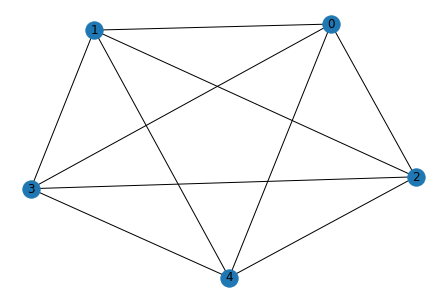

In [1]:
#matriz adjacency: 1 se i,j tão conectados e 0 se não tão

import networkx as nx

F = nx.complete_graph(5)
nx.draw(F, with_labels=True)

In [2]:
A = nx.adjacency_matrix(F).todense() #transforma em matrix
print(A)

[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


In [3]:
print(type(A))

<class 'numpy.matrix'>


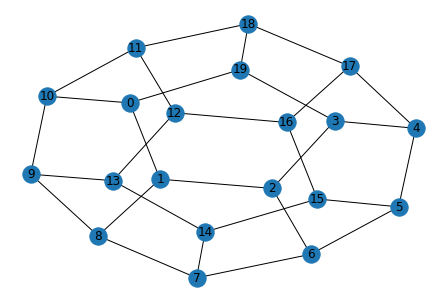

In [4]:
G = nx.dodecahedral_graph()
nx.draw(G, with_labels=True)

In [5]:
A = nx.adjacency_matrix(G).todense() 
print(A)

[[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


In [8]:
#encontrar o menor caminho (shortest path) entre 0 e 15:
i = 0
j = 15
k = 1
Ak = A

while Ak[i,j] == 0:

    Ak = Ak @ A
    k += 1

print('O tamanho do menor caminho é: ', k)

O tamanho do menor caminho é:  5


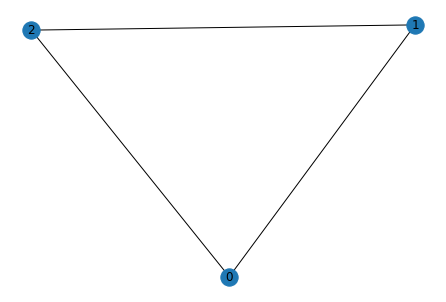

In [9]:
#triangulos: T(G)= (1/6)*(delta^3_1+...delta^3_n), onde os delta_n são os autovalores da matriz
#adjacente

C3 = nx.complete_graph(3)
nx.draw(C3, with_labels=True)

In [12]:
A3 = nx.adjacency_matrix(C3).todense()
print(A3)
eigvals, eigvec = la.eig(A3)

[[0 1 1]
 [1 0 1]
 [1 1 0]]


In [13]:
int(np.round(np.sum(eigvals.real**3)/6,0)) #triangulo

1

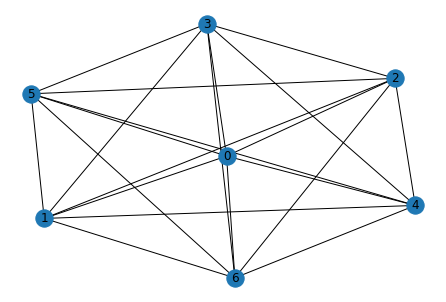

In [14]:
C7 = nx.complete_graph(7)
nx.draw(C7,with_labels=True)

In [15]:
A7 = nx.adjacency_matrix(C7).todense()
eigvals, eigvecs = la.eig(A7)
int(np.round(np.sum(eigvals.real**3)/6,0)) #há 35 triangulos no grafo com 7 vertices

35

In [16]:
def triangles(M):
    A = (M + M.T)/2      #os delta do traingulo são os autovalores da matrix simetrica A
    eigvals, eigvecs = la.eig(A)
    eigvals = eigvals.real
    return int(np.round(np.sum(eigvals**3)/6,0))

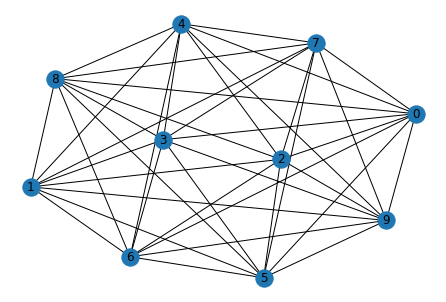

In [17]:
G = nx.turan_graph(10,5)
nx.draw(G,with_labels=True)

In [18]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 0 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 0 0]]


In [19]:
triangles(A)

80

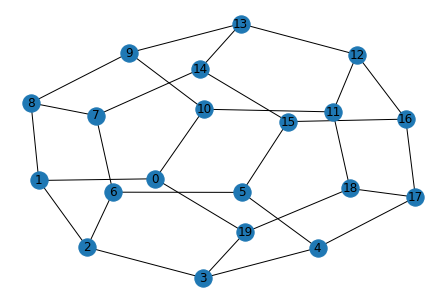

In [20]:
G = nx.dodecahedral_graph()
nx.draw(G,with_labels=True)

In [21]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


In [22]:
np.round(triangles(A),2) #tem zero triangulos no dodecaedro

0